# Satellitengeodäsie - Ü2: Geodätische Raumverfahren
---

In [13]:
%matplotlib inline
import numpy as np
from numpy import sin, cos
import math
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import nbconvert

In [14]:
signals = {'a1' : np.loadtxt(r'Signalsasc 2021-11-02 13_35_02.sec', skiprows = 1, usecols = 0),
           'a2' : np.loadtxt(r'Signalsasc 2021-11-02 13_35_02.sec', skiprows = 1, usecols = 1),
           'a3' : np.loadtxt(r'Signalsasc 2021-11-02 13_35_02.sec', skiprows = 1, usecols = 2),
           'b1' : np.loadtxt(r'Signalsasc 2021-11-02 13_35_02.sec', skiprows = 1, usecols = 3),
           'b2' : np.loadtxt(r'Signalsasc 2021-11-02 13_35_02.sec', skiprows = 1, usecols = 4),
           'b3' : np.loadtxt(r'Signalsasc 2021-11-02 13_35_02.sec', skiprows = 1, usecols = 5)}

## Aufgabe 1 - VLBI: Kreuzkorrelationsfunktion
---

### Korrelieren der Signale

In [15]:
signals_cor = {'a1 und b1': np.correlate(signals['a1'],signals['b1'], mode = 'full'),
              'a2 und b2': np.correlate(signals['a2'],signals['b2'], mode = 'full'),
              'a3 und b3': np.correlate(signals['a3'],signals['b3'], mode = 'full')}

In [16]:
#Berechnung der Verzögerung zwischen den Datenreihen 
offset = {'a1 und b1': len(signals_cor['a1 und b1'])//2 - np.argmax(signals_cor['a1 und b1']),
          'a2 und b2': len(signals_cor['a2 und b2'])//2 - np.argmax(signals_cor['a2 und b2']),
          'a3 und b3': len(signals_cor['a3 und b3'])//2 - np.argmax(signals_cor['a3 und b3'])}

In [17]:
def plotSignalCor(name, signal):
    fig = plt.figure(figsize = (10,5))
    fig.suptitle('Korrelationsfunktion von ' + name, fontsize = 14, fontweight = 'bold')
    plt.plot(signal, color = '#069AF3',lw = 0.5)
    plt.xlabel('Zeiteinheit', fontsize = 13)
    plt.ylabel('Korrelation', fontsize = 13)
    plt.figtext(0.1, -0.05, 'Maximum bei ' + str(np.argmax(signals_cor[name])) + ' Elementen' + '\nOffset: ' + str(offset[name]) + ' Einheiten', fontsize = 12)

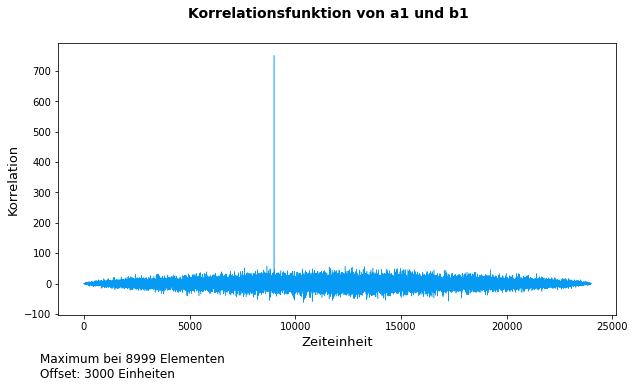

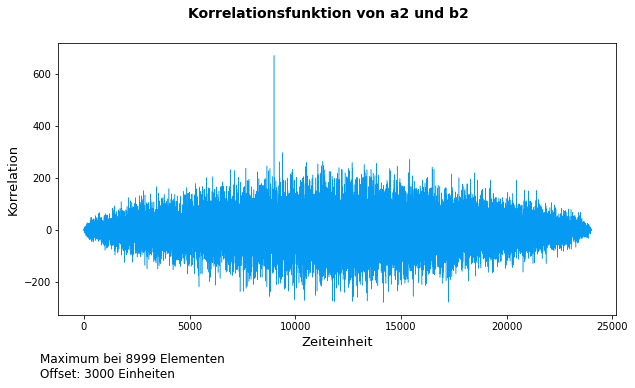

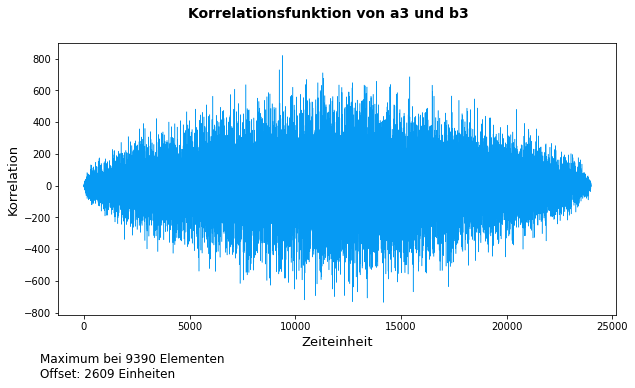

In [18]:
for i in signals_cor:
    plotSignalCor(i, signals_cor[i])

## Aufgabe 2 - SLR: Energy Balance
___

#### Konstanten:

In [19]:
L = 6000*1000 #[m] - Distanz Teleskop-Reflektor
L_moon = 384000 * 1000 #[m] - Distanz Teleskop-Reflektor (zum Mond)
dR = 3.8 / 100 #[m] - Durchmesser Reflektor
dT = 75 / 100 #[m] - Durchmesser Teleskop
theta_s = 25 * 10**-6 #[rad] - Divergenzwinkel des Sendelasers
theta_r = 34 * 10**-6 #[rad] - Divergenzwinkel des Reflektors
Es = 0.2 #[J] - Ausgesandte Energie

#### Oberfläche des Reflektors und Empfangsoptik:

In [20]:
Ar = (dR/2)**2*np.pi #m^2
At = (dT/2)**2*np.pi #m^2

#### Beleuchtende Oberﬂäche auf dem Reﬂektor und dem Teleskop:

In [21]:
A_theta_s = ((L*theta_s)/2)**2*np.pi #m^2
A_theta_r = ((L*theta_r)/2)**2*np.pi #m^2

A_theta_s_moon = ((L_moon*theta_s)/2)**2*np.pi #m^2
A_theta_r_moon = ((L_moon*theta_r)/2)**2*np.pi #m^2

### 2.1: Energiebilanz mit Reflektor auf der Erde

In [22]:
#Ankommende Energie Satellit
Er = (Ar/A_theta_s)*Es #Joule

#Eingehende Energie Teleskop
Et = ((At*Ar)/(A_theta_r*A_theta_s))*Es #Joule

print('Reflektierte Energie am Satelliten: ' + str(round(Er,10)) + ' Joule' + '\nEmpfangene Energie am Teleskop: ' + str(round(Et,15)) + ' Joule')


Reflektierte Energie am Satelliten: 1.28e-08 Joule
Empfangene Energie am Teleskop: 1.73e-13 Joule


### 2.2: Energiebilanz mit Reflektor auf dem Mond 

In [23]:
#Ankommende Energie Satellit
Er = (Ar/A_theta_s_moon)*Es #Joule

#Eingehende Energie Teleskop
Et = ((At*Ar)/(A_theta_r_moon*A_theta_s_moon))*Es #Joule

print('Reflektierte Energie auf dem Mond: ' + str(round(Er,14)) + ' Joule' + '\nEmpfangene Energie am Teleskop: ' + str(round(Et,23)) + ' Joule')


Reflektierte Energie auf dem Mond: 3.13e-12 Joule
Empfangene Energie am Teleskop: 1.034e-20 Joule
